In [1]:
!rm -rf Snudda
!git clone https://github.com/Hjorthmedh/Snudda.git

Cloning into 'Snudda'...
remote: Enumerating objects: 257, done.
remote: Counting objects: 100% (257/257), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 4965 (delta 123), reused 240 (delta 117), pack-reused 4708
Receiving objects: 100% (4965/4965), 205.70 MiB | 12.61 MiB/s, done.
Resolving deltas: 100% (3505/3505), done.
Updating files: 100% (8088/8088), done.


This example creates a small toy example, you can increase the network size. For more information please see https://github.com/Hjorthmedh/Snudda/wiki/Developer-Installation-Guide

In [2]:
cd Snudda

/home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda


In [3]:
#!git reset --hard 96669669fb9ad0875b7bc36028ce0070254158c5

In [4]:
!pip3 install --upgrade -e .[dev]

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda
     |████████████████████████████████| 70 kB 1.3 MB/s  eta 0:00:01
     |████████████████████████████████| 2.7 MB 45.4 MB/s eta 0:00:01
     |████████████████████████████████| 84 kB 528 kB/s  eta 0:00:01
     |████████████████████████████████| 90 kB 1.5 MB/s  eta 0:00:01
     |████████████████████████████████| 121 kB 79.0 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 777 kB/s  eta 0:00:01
     |████████████████████████████████| 89 kB 1.4 MB/s  eta 0:00:01
     |████████████████████████████████| 97 kB 1.1 MB/s  eta 0:00:01


  Running setup.py develop for snudda


In [5]:
!snudda init networks/tinySim --size 100 --overwrite 

Creating config file
Network path: networks/tinySim
Creating missing directory networks/tinySim
CreateConfig
Using 1 functional channels
Adding Striatum with 100 neurons
Using cube for striatum
Creating cube mesh
File: networks/tinySim/mesh/Striatum-cube-mesh-0.00010749824478388102.obj
Centre: [0.00354  0.004645 0.005081]
Side: 0.00010749824478388102
Description: Striatum cube mesh, centre = [0.00354  0.004645 0.005081], side = 0.00010749824478388102
Adding neurons: FSN from dir /home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudda/data/cellspecs/fs
Adding neurons: dSPN from dir /home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudda/data/cellspecs/dspn
Adding neurons: iSPN from dir /home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudda/data/cellspecs/ispn
Adding neurons: ChIN from dir /home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudda/data/cellspe

In [6]:
!snudda place networks/tinySim

Placing neurons
Network path: networks/tinySim
Creating missing directory networks/tinySim/log
Using runID = 1
Using hdf5 version: latest
Parsing configuration file networks/tinySim/network-config.json
Using meshBinWidth 0.00010749824478388102
Cube mesh, switching to serial processing.
No mesh cache file found (networks/tinySim/mesh/Striatum-cube-mesh-0.00010749824478388102.obj-107-cache.pickle)
Running in serial
Voxel mask: 5x5x5
Processing x = 0
Processing x = 1
Processing x = 2
Processing x = 3
Processing x = 4
Fraction of border voxels: 0.0
Saving mesh cache file networks/tinySim/mesh/Striatum-cube-mesh-0.00010749824478388102.obj-107-cache.pickle
Calculation time: 0.01307436999923084 s
Setup voxel list
Setup place neurons
Update padding mask
Regenerating new random pool
Setup done
Inner voxel bin volume: 0.0 mm³
Using dimensions from config file
Adding: 1 FSN_0
No cache file found.
Saving cache file: /home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/

In [7]:
!snudda detect networks/tinySim

Touch detection
Network path: networks/tinySim
Creating missing directory networks/tinySim/voxels
Using runID = 2
Already have a log file setup, ignoring
Using hdf5 driver version: latest
{'total': 8024160, 'free': 6199764, 'used': 1824396}
Each hyper voxel has 100 x 100 x 100 voxels
Touch detecting all volumes
Loading from networks/tinySim/network-config.json
Reading prototype for: FSN_0
Found cache file: /home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudda/data/cellspecs/fs/str-fs-e160628_FS2-mMTC180800A-IDB-v20190226/MTC180800A-IDB-cor-rep-cache.pickle
Reading prototype for: dSPN_0
Found cache file: /home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudda/data/cellspecs/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20190508/WT-0728MSN01-cor-rep-ax-cache.pickle
Reading prototype for: dSPN_1
Found cache file: /home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudda/data/cellspecs/dspn/str-

Create lookup table
detectSynapses: 3166 took 0.12662174100114498s
Create lookup table
detectGapJunctions: 0.08613451400015038s
Wrote hyper voxel 20 (3166 synapses, 0 gap junctions)
HyperID 20 completed - 3166 synapses and 0 gap junctions found (29.36770850999892s)
Processing hyper voxel : 16/64 (82 neurons)
Placing 40727 random axon points for ChIN_0(cached)
nPoints = 40727
Bounding box appears to be outside hyper voxel
placeSynapsesNoAxonSphere: 0.06313487799889117s, hyperID: 16
Create lookup table
detectSynapses: 708 took 0.03426286699868797s
Create lookup table
detectGapJunctions: 0.0264492030000838s
Wrote hyper voxel 16 (708 synapses, 0 gap junctions)
HyperID 16 completed - 708 synapses and 0 gap junctions found (25.022684055000354s)
Processing hyper voxel : 1/64 (78 neurons)
Placing 40727 random axon points for ChIN_0(cached)
nPoints = 40727
placeSynapsesNoAxonSphere: 0.03540623300068546s, hyperID: 1
Create lookup table
detectSynapses: 546 took 0.028039474000252085s
Create lookup

Processing hyper voxel : 26/64 (1 neurons)
Create lookup table
detectSynapses: 0 took 0.005718570000681211s
Create lookup table
detectGapJunctions: 0.0031834830006118864s
Wrote hyper voxel 26 (0 synapses, 0 gap junctions)
HyperID 26 completed - 0 synapses and 0 gap junctions found (0.18430867200004286s)
Processing hyper voxel : 40/64 (1 neurons)
Create lookup table
detectSynapses: 0 took 0.005690261999916402s
Create lookup table
detectGapJunctions: 0.0031794290007383097s
Wrote hyper voxel 40 (0 synapses, 0 gap junctions)
HyperID 40 completed - 0 synapses and 0 gap junctions found (0.43982824299928325s)

Program run time: 289.3098608340006


In [8]:
!snudda prune networks/tinySim

Prune synapses
Network path: networks/tinySim
Using runID = 3
preMergeOnly : False
Setting random seed: None
Using hdf5 driver sec2, latest version
Opening work history file: networks/tinySim/log/network-detect-worklog.hdf5
/home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudda/prune.py:352: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.SlurmID = self.histFile["meta/SlurmID"].value
/home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudda/prune.py:353: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.hyperVoxelIDs = self.histFile["meta/hyperVoxelIDs"].value
/home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudda/prune.py:354: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.allHyperIDs = self.histFile["allHyperIDs"].value
/home/akozlov/doc/hbp-bsp-live-papers-dev

Saving morphology in HDF5 file: /home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudda/data/cellspecs/ispn/str-ispn-e150917_c11_D2-mWT-MSN1-v20190603/WT-MSN1-cor-rep-ax.swc
Saving morphology in HDF5 file: /home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudda/data/cellspecs/ispn/str-ispn-e150908_c4_D2-m51-5-DE-v20190611/51-5-DE-cor-rep-ax.swc
Saving morphology in HDF5 file: /home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudda/data/cellspecs/chin/str-chin-e170614_cell6-m17JUL301751_170614_no6_MD_cell_1_x63-v20190710/17JUL301751_170614_no6_MD_cell_1_x63-cor-noaxon.swc
Saving morphology in HDF5 file: /home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudda/data/cellspecs/lts/LTS_Experiment-9862_20181211/lts_morp_2019-11-07_centered_noAxon.swc
maxAxonVoxelCtr = 9
maxDendVoxelCtr = 6
Synapses: 2/119924 (heap size: 11)
Flushing networks/tinySim//network-puta

In [9]:
!snudda input networks/tinySim --input snudda/data/config/input-tinytest-v6.json --time 1.0

Setting up inputs, assuming input.json exists
Using runID = 4
Writing input spikes to networks/tinySim/input-spikes.hdf5
Time = 1.0
Setting random seed: None
Using hdf5 version latest
Loading HDF5-file: networks/tinySim/network-pruned-synapses.hdf5
/home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudda/input.py:1071: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.networkConfigFile = f["meta"]["configFile"].value
/home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudda/input.py:1072: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.positionFile = f["meta"]["positionFile"].value
/home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudda/input.py:1073: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.networkSlurmID = int(f["meta/SlurmID"].value)
/home/akozlov/doc/hbp-b

Generating 160 inputs for dSPN_2
Gathering 19 - CorticalBase
Generating 155 inputs for dSPN_2
Gathering 19 - CorticalSignal
Generating 114 inputs for dSPN_2
Gathering 19 - Thalamic
Generating 153 inputs for iSPN_1
Gathering 20 - CorticalBase
Generating 144 inputs for iSPN_1
Gathering 20 - CorticalSignal
Generating 96 inputs for iSPN_1
Gathering 20 - Thalamic
Generating 173 inputs for iSPN_1
Gathering 21 - CorticalBase
Generating 180 inputs for iSPN_1
Gathering 21 - CorticalSignal
Generating 87 inputs for iSPN_1
Gathering 21 - Thalamic
Generating 209 inputs for dSPN_1
Gathering 22 - CorticalBase
Generating 188 inputs for dSPN_1
Gathering 22 - CorticalSignal
Generating 123 inputs for dSPN_1
Gathering 22 - Thalamic
Generating 163 inputs for iSPN_1
Gathering 23 - CorticalBase
Generating 181 inputs for iSPN_1
Gathering 23 - CorticalSignal
Generating 86 inputs for iSPN_1
Gathering 23 - Thalamic
Generating 231 inputs for dSPN_3
Gathering 24 - CorticalBase
Generating 212 inputs for dSPN_3
Gath

Gathering 63 - Cortical
Generating 75 inputs for ChIN_0
Gathering 63 - Thalamic
Generating 225 inputs for dSPN_3
Gathering 64 - CorticalBase
Generating 217 inputs for dSPN_3
Gathering 64 - CorticalSignal
Generating 134 inputs for dSPN_3
Gathering 64 - Thalamic
Generating 147 inputs for dSPN_2
Gathering 65 - CorticalBase
Generating 153 inputs for dSPN_2
Gathering 65 - CorticalSignal
Generating 103 inputs for dSPN_2
Gathering 65 - Thalamic
Generating 168 inputs for dSPN_2
Gathering 66 - CorticalBase
Generating 146 inputs for dSPN_2
Gathering 66 - CorticalSignal
Generating 96 inputs for dSPN_2
Gathering 66 - Thalamic
Generating 211 inputs for iSPN_2
Gathering 67 - CorticalBase
Generating 223 inputs for iSPN_2
Gathering 67 - CorticalSignal
Generating 111 inputs for iSPN_2
Gathering 67 - Thalamic
Generating 137 inputs for iSPN_3
Gathering 68 - CorticalBase
Generating 150 inputs for iSPN_3
Gathering 68 - CorticalSignal
Generating 81 inputs for iSPN_3
Gathering 68 - Thalamic
Generating 252 in

In [10]:
!nrnivmodl snudda/data/cellspecs/mechanisms

Creating x86_64 directory for .o files.

/home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda
ls: cannot access 'snudda/data/cellspecs/mechanisms/*.inc': No such file or directory
snudda/data/cellspecs/mechanisms/Kv3_ch.mod snudda/data/cellspecs/mechanisms/bk_ch.mod snudda/data/cellspecs/mechanisms/bk_fs.mod snudda/data/cellspecs/mechanisms/bk_ms.mod snudda/data/cellspecs/mechanisms/ca_ch.mod snudda/data/cellspecs/mechanisms/cadyn_fs.mod snudda/data/cellspecs/mechanisms/cadyn_ms.mod snudda/data/cellspecs/mechanisms/cal12_ms.mod snudda/data/cellspecs/mechanisms/cal13_ms.mod snudda/data/cellspecs/mechanisms/cal_ch.mod snudda/data/cellspecs/mechanisms/caldyn_ms.mod snudda/data/cellspecs/mechanisms/can_fs.mod snudda/data/cellspecs/mechanisms/can_ms.mod snudda/data/cellspecs/mechanisms/cap_ch.mod snudda/data/cellspecs/mechanisms/caq_fs.mod snudda/data/cellspecs/mechanisms/caq_ms.mod snudda/data/cellspecs/mechanisms/car_fs.mod snudda/data/cellspecs/mechanisms/car

libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/include/nrn -I/usr/lib -O2 -pipe -mtune=native -c can_fs.c  -fPIC -DPIC -o .libs/can_fs.o
"/usr/bin/nocmodl" can_ms
Translating can_ms.mod into can_ms.c
Thread Safe
"/usr/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/include/nrn" -I"/usr/lib"      -O2 -pipe -mtune=native -c -o can_ms.lo can_ms.c
"/usr/bin/nocmodl" cap_ch
Translating cap_ch.mod into cap_ch.c
Notice: Assignment to the GLOBAL variable, "mtau", is not thread safe
Notice: Assignment to the GLOBAL variable, "minf", is not thread safe
"/usr/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/include/nrn" -I"/usr/lib"      -O2 -pipe -mtune=native -c -o cap_ch.lo cap_ch.c
"/usr/bin/nocmodl" caq_fs
Translating caq_fs.mod into caq_fs.c
Thread Safe
"/usr/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/include/nrn" -I"/usr/lib"      -O2 -pipe -mtune=native -c -o caq_fs.lo ca

libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/include/nrn -I/usr/lib -O2 -pipe -mtune=native -c kdrbca1_lts.c  -fPIC -DPIC -o .libs/kdrbca1_lts.o
"/usr/bin/nocmodl" kir2_ch
Translating kir2_ch.mod into kir2_ch.c
Thread Safe
"/usr/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/include/nrn" -I"/usr/lib"      -O2 -pipe -mtune=native -c -o kir2_ch.lo kir2_ch.c
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/include/nrn -I/usr/lib -O2 -pipe -mtune=native -c kir2_ch.c  -fPIC -DPIC -o .libs/kir2_ch.o
"/usr/bin/nocmodl" kir_fs
Translating kir_fs.mod into kir_fs.c
Thread Safe
"/usr/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/include/nrn" -I"/usr/lib"      -O2 -pipe -mtune=native -c -o kir_fs.lo kir_fs.c
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/include/nrn -I/usr/lib -O2 -pipe -mtune=native -c kir_fs.c  -fPIC -DPIC -o .libs/kir_fs.o
"/usr/bin/nocmodl" kir_ms
Translating kir_ms.mod into 

libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/include/nrn -I/usr/lib -O2 -pipe -mtune=native -c vecevent.c  -fPIC -DPIC -o .libs/vecevent.o
"/usr/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/include/nrn" -I"/usr/lib"      -O2 -pipe -mtune=native -c -o mod_func.lo mod_func.c
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/usr/include/nrn -I/usr/lib -O2 -pipe -mtune=native -c mod_func.c  -fPIC -DPIC -o .libs/mod_func.o
"/usr/share/nrn/libtool" --tag=CC --mode=link mpicc -module  -O2 -pipe -mtune=native    -o libnrnmech.la -rpath "/usr/lib"  Kv3_ch.lo bk_ch.lo bk_fs.lo bk_ms.lo ca_ch.lo cadyn_fs.lo cadyn_ms.lo cal12_ms.lo cal13_ms.lo cal_ch.lo caldyn_ms.lo can_fs.lo can_ms.lo cap_ch.lo caq_fs.lo caq_ms.lo car_fs.lo car_ms.lo cat32_ms.lo cat33_ms.lo h_lts.lo hcn12_ch.lo im_lts.lo it_lts.lo kaf_fs.lo kaf_ms.lo kas_fs.lo kas_ms.lo kcnq_ch.lo kdr_fs.lo kdr_ms.lo kdrbca1_lts.lo kir2_ch.lo kir_fs.lo kir_ms.lo kv2_ch.lo kv4_ch.lo na2_ch.lo na

In [11]:
# This generates the plots from the analysis for the connectivity
# !python3 snudda/analyse_striatum.py networks/tinySim

In [12]:
#!snudda simulate networks/tinySim --time 0.1 --voltOut networks/tinySim/volt.txt
#!mpirun -n 4 snudda simulate networks/tinySim/ --time 1.0 --input networks/tinySim/input-spikes.hdf5 --voltOut networks/tinySim/simulation/volt.txt
!snudda simulate networks/tinySim/ --time 0.1 --input networks/tinySim/input-spikes.hdf5 --voltOut networks/tinySim/simulation/volt.txt

NEURON: unable to open font "*helvetica-medium-r-normal*--14*", using "fixed"
Creating missing directory networks/tinySim/simulation
Using input file networks/tinySim/input-spikes.hdf5
args: Namespace(action='simulate', cont=False, disableGJ=False, h5legacy=False, hvsize=None, input='networks/tinySim/input-spikes.hdf5', inputFile=None, mechDir=None, mergeonly=False, nchannels=1, networkFile=None, overwrite=False, path='networks/tinySim', profile=False, size=None, spikesOut=None, time=0.1, verbose=False, voltOut='networks/tinySim/simulation/volt.txt', volumeID=None)
Using networkFile: networks/tinySim/network-pruned-synapses.hdf5
Using inputFile: networks/tinySim/input-spikes.hdf5
Using logFile: networks/tinySim/log/network-simulation-log.txt
Creating save/traces
Worker 0: Loading network from networks/tinySim/network-pruned-synapses.hdf5
Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
/home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2

Neuron dSPN_1 resting voltage = -87
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 23 iSPN_1
Neuron iSPN_1 resting voltage = -83
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 24 dSPN_3
Neuron dSPN_3 resting voltage = -86
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 25 iSPN_1
Neuron iSPN_1 resting voltage = -83
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 26 iSPN_2
Neuron iSPN_2 resting voltage = -86
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 27 iSPN_3
Neuron iSPN_3 resting voltage = -86
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 28 dSPN_1
Neuron dSPN_1 resting voltage = -87
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 29 iSPN_0
Neuron iSPN_0 resting voltage = -83
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 30 dSPN_1
Neuron dSPN_1 resting voltage = -87
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 31 dSPN_0
N

Neuron dSPN_3 resting voltage = -86
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 97 iSPN_3
Neuron iSPN_3 resting voltage = -86
!!! Popping extra segment from neuron -- temp fix!
Node 0 - cell 98 iSPN_2
Neuron iSPN_2 resting voltage = -86
!!! Popping extra segment from neuron -- temp fix!
0: Memory status: 79% free
connectNetworkSynapses
Adding gap junctions.
connectNetworkGapJunctionsLOCAL
Finding node local gap junctions...
0: Memory status: 79% free
Adding external (cortical, thalamic) input from networks/tinySim/input-spikes.hdf5
/home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudda/simulate.py:1137: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  modFile = neuronInput["modFile"].value
/home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudda/simulate.py:1138: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  paramList = json

In [13]:
%matplotlib inline

In [14]:
# This generates the spike raster in command line
#!python3 snudda/plotting/Network_plot_spike_raster.py networks/tinySim/output-spikes.txt networks/tinySim/network-pruned-synapses.hdf5
#!python3 snudda/plotting/Network_plot_spike_raster.py networks/tinySim/simulation/network-output-spikes-666.txt networks/tinySim/network-pruned-synapses.hdf5

In [15]:
# This generates volt traces in command line
# !python3 snudda/plotting/Network_plot_traces.py networks/tinySim/simulation/volt.txt networks/tinySim/network-pruned-synapses.hdf5

Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
99 neurons with 6582 synapses and 10000 gap junctions
Load done. 0.030750240999623202
Sort the traces
Sort the traces


/home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudda/load.py:53: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data["config"] = f["config"].value
/home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudda/load.py:54: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.config = json.loads(f["config"].value)
/home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudda/load.py:81: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  * f["meta/voxelSize"].value \
/home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudda/load.py:82: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  + f["meta/simulationOrigo"].value
/home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudda/load.py:103: H5pyDep

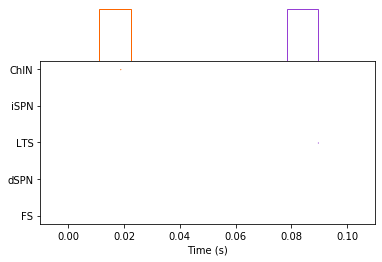

<Figure size 432x288 with 0 Axes>

Saving networks/tinySim/figs/network-output-spikes-666-colour.png


<Figure size 432x288 with 0 Axes>

In [16]:
# This generates spike raster, plot visible in the jupyter notebook
from snudda.plotting.Network_plot_spike_raster import NetworkPlotSpikeRaster

fileName = "networks/tinySim/simulation/network-output-spikes-666.txt"
networkFile = "networks/tinySim/network-pruned-synapses.hdf5"
endTime = 0.1
npsr = NetworkPlotSpikeRaster(fileName,networkFile,skipTime=0.0,
                                  endTime=endTime,
                                  typeOrder=["FSN","dSPN","LTS","iSPN","ChIN"])

Unable to guess ID, using 666.
Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
99 neurons with 6582 synapses and 10000 gap junctions
Load done. 0.02880768299837655
!!! Excluding first 0s from the plot
Plotting traces: [0, 4, 5, 6, 8]
Plotted 5 traces (total 99)


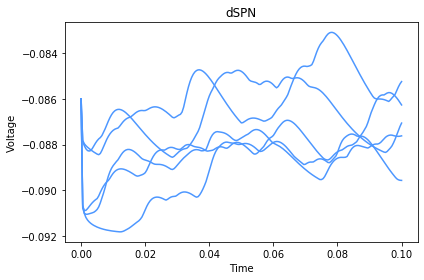

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-dSPN-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [1, 2, 3, 7, 12]
Plotted 5 traces (total 99)


<Figure size 432x288 with 0 Axes>

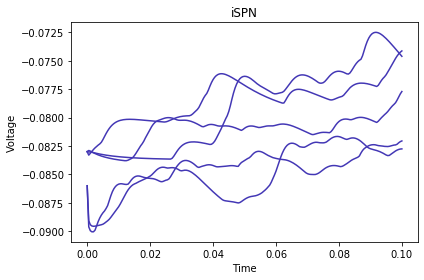

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-iSPN-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [79]
Plotted 1 traces (total 99)


<Figure size 432x288 with 0 Axes>

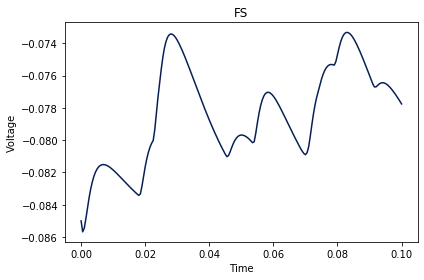

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-FSN-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [88]
Plotted 1 traces (total 99)


<Figure size 432x288 with 0 Axes>

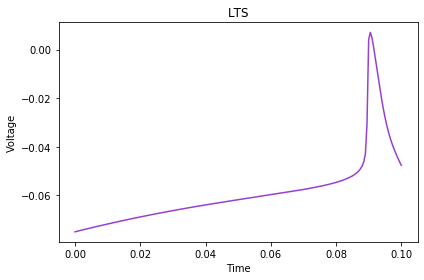

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-LTS-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [63]
Plotted 1 traces (total 99)


<Figure size 432x288 with 0 Axes>

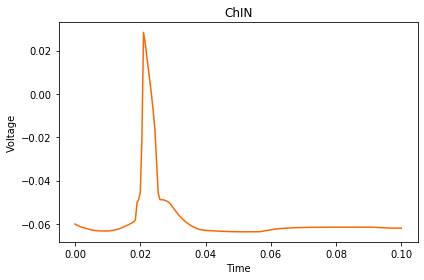

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-ChIN-colour.png


<Figure size 432x288 with 0 Axes>

In [17]:
# This generates the voltage trace, plot visible in jupyter notebook
from snudda.plotting.Network_plot_traces import NetworkPlotTraces

fileName = "networks/tinySim/simulation/volt.txt"
npt = NetworkPlotTraces(fileName,networkFile)
networkFile = "networks/tinySim/network-pruned-synapses.hdf5"

plotOffset = 0 # -0.2
skipTime = 0 #0.5
nTracesMax = 5
    
npt.plotTraceNeuronType(neuronType="dSPN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="iSPN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="FSN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="LTS",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="ChIN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)


Loading networks/tinySim/network-pruned-synapses.hdf5
Assuming volume type: cube[cube or full]
Only using 20000neurons of the connection data
Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
99 neurons with 6582 synapses and 10000 gap junctions
Load done. 0.02413837399944896
Number of neurons: 99
Synapse row 0 - 0.0 % time: 0.0017809050004871096 seconds
Created connection matrix 0.012210757000502781 seconds
GJ row : 0 - 0.0 %  time : 0.0006120409998402465 seconds
Created gap junction connection matrix 0.03623026000059326 seconds
Creating population dictionary
Done.
!!! Setting sideLen to None
Calculating synapse distance histogram
Creating dist histogram
nSynapses = 6582, at 0
Created distance histogram (optimised) in 0.013554179999118787 seconds
Saving cache to networks/tinySim/network-pruned-synapses.hdf5-cache
Plotting connection probability dSPN to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calcula

/home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudda/load.py:53: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data["config"] = f["config"].value
/home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudda/load.py:54: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.config = json.loads(f["config"].value)
/home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudda/load.py:103: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  configFile = f["meta/configFile"].value
/home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudda/load.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  positionFile = f["meta/positionFile"].value
/home/akozlov/doc/hbp-bsp-live-papers-dev-priv/2020/hjorth_et_al_2020/work/Snudda/snudd

P(d<5e-05)=0.055080721747388414
P(d<0.0001)=0.049820236260914225


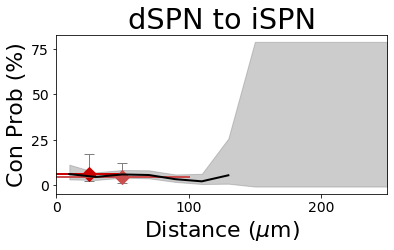

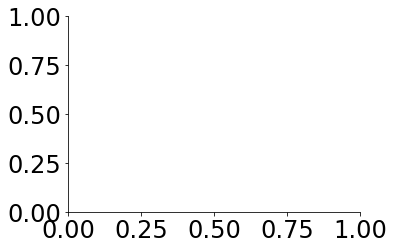

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-dSPN-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability dSPN to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [1842.]
Rejected (too large z-depth): 414
P(d<5e-05)=0.269825918762089
P(d<0.0001)=0.23131868131868133


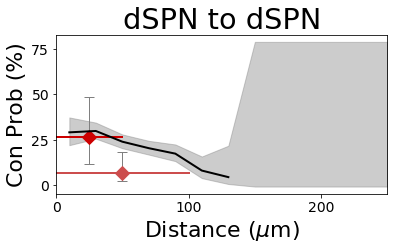

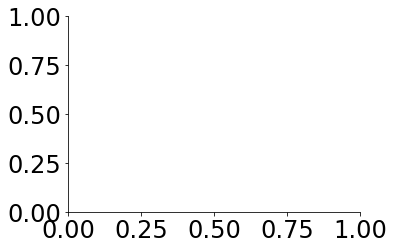

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-dSPN-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability iSPN to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [1965.]
Rejected (too large z-depth): 339
P(d<5e-05)=0.2706552706552707
P(d<0.0001)=0.24345146379044685


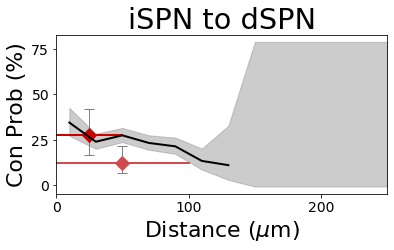

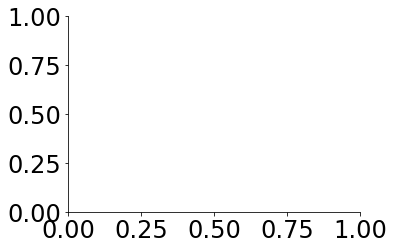

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-iSPN-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability iSPN to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [1994.]
Rejected (too large z-depth): 262
P(d<5e-05)=0.3431952662721893
P(d<0.0001)=0.3146464646464647


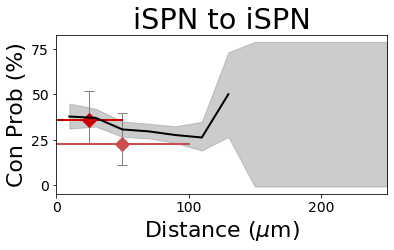

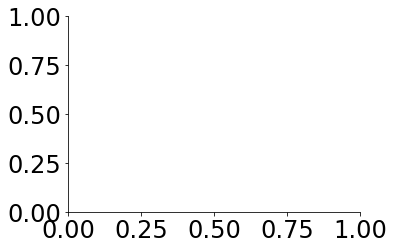

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-iSPN-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability FSN to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [48.]
Rejected (too large z-depth): 0
P(d<0.0001)=0.6875
P(d<0.00015)=0.6875
P(d<0.00025)=0.6875


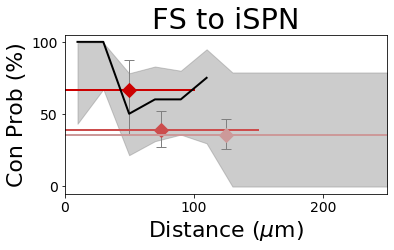

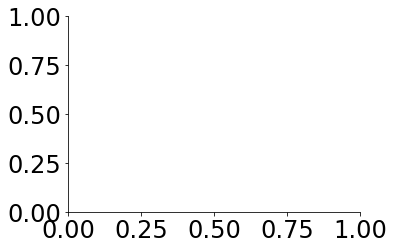

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability FSN to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [48.]
Rejected (too large z-depth): 0
P(d<0.0001)=0.8913043478260869
P(d<0.00015)=0.8958333333333334
P(d<0.00025)=0.8958333333333334


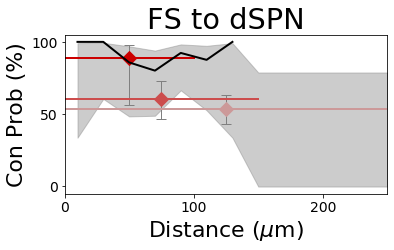

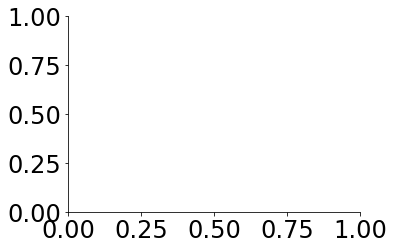

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability FSN to FSN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [0.]
Rejected (too large z-depth): 0
P(d<0.00025)=0.0


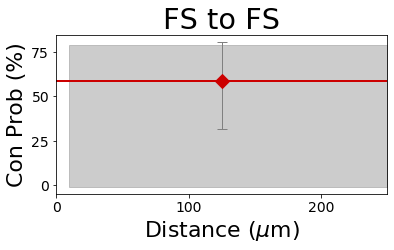

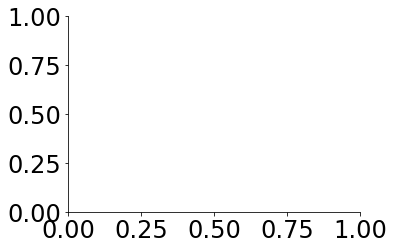

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-FSN-synapses-2D-dist.pdf
Plotting connection probability FSN to FSN (gapjunctions)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [0.]
Rejected (too large z-depth): 0
P(d<0.00025)=0.0
P(d<0.00025)=0.0


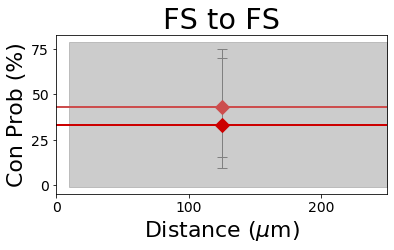

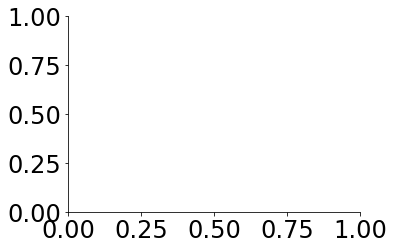

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-FSN-gapjunctions-2D-dist.pdf
Plotting connection probability LTS to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [48.]
Rejected (too large z-depth): 0
P(d<0.00025)=0.125


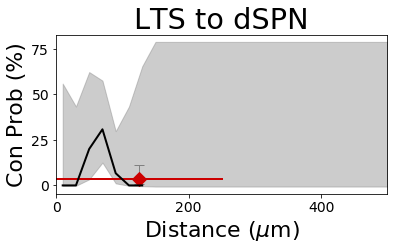

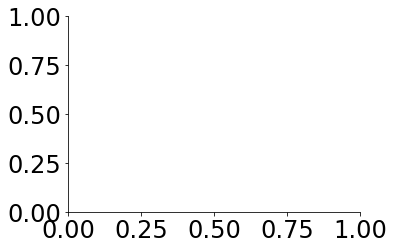

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-LTS-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability LTS to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [48.]
Rejected (too large z-depth): 0
P(d<0.00025)=0.08333333333333333


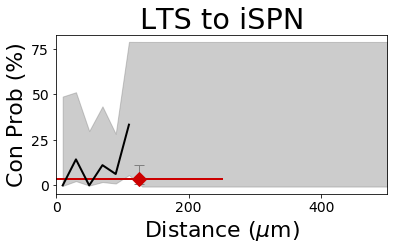

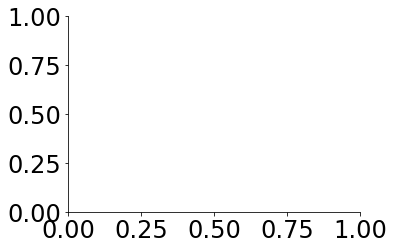

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-LTS-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability FSN to LTS (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [1.]
Rejected (too large z-depth): 0
P(d<0.00025)=1.0


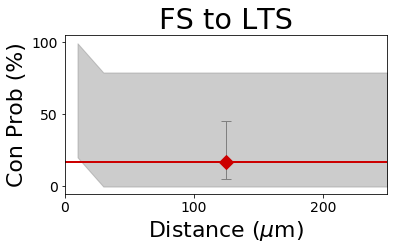

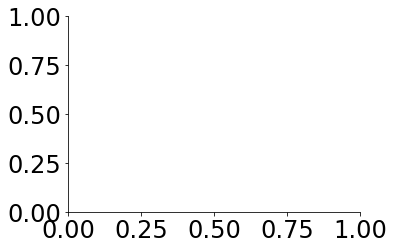

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-LTS-synapses-2D-dist.pdf
Plotting connection probability ChIN to LTS (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [1.]
Rejected (too large z-depth): 0


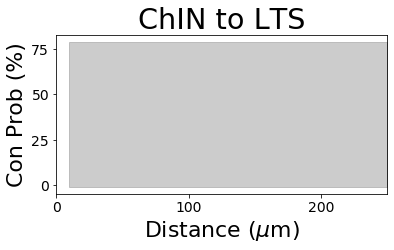

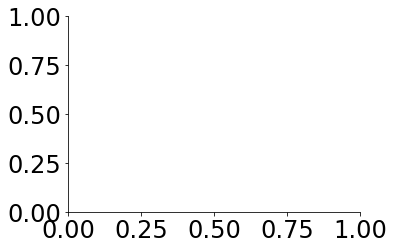

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-LTS-synapses-2D-dist.pdf
Plotting connection probability ChIN to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [46.]
Rejected (too large z-depth): 2
P(d<0.00025)=0.0


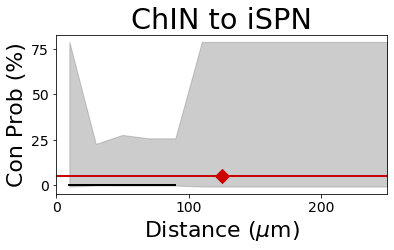

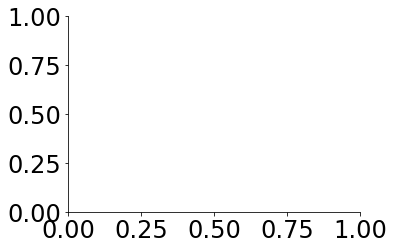

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability ChIN to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [43.]
Rejected (too large z-depth): 5
P(d<0.00025)=0.0


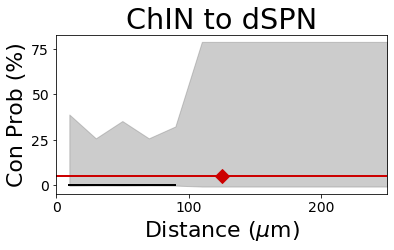

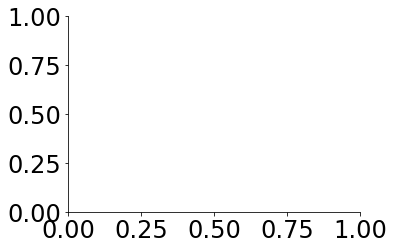

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability LTS to ChIN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [1.]
Rejected (too large z-depth): 0


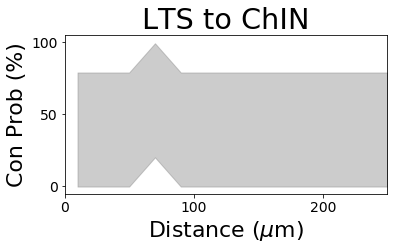

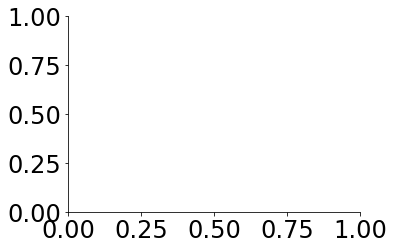

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-LTS-to-ChIN-synapses-2D-dist.pdf
Plotting connection probability ChIN to FSN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [1.]
Rejected (too large z-depth): 0


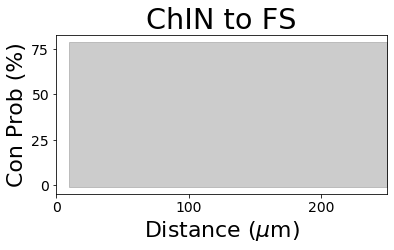

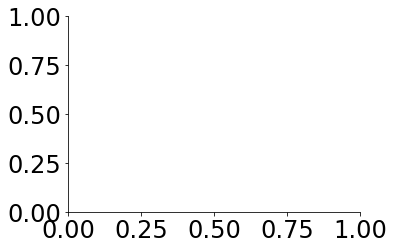

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-FSN-synapses-2D-dist.pdf
Plotting connection probability dSPN to ChIN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [43.]
Rejected (too large z-depth): 5


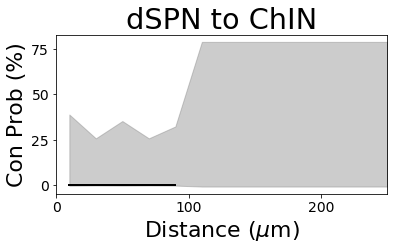

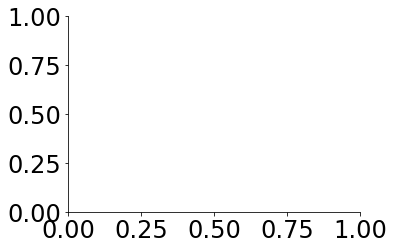

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-dSPN-to-ChIN-synapses-2D-dist.pdf
Plotting connection probability iSPN to ChIN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [46.]
Rejected (too large z-depth): 2


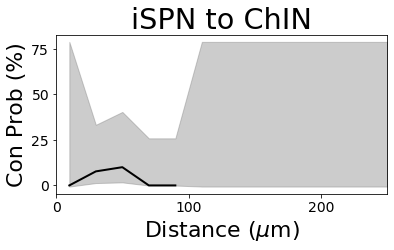

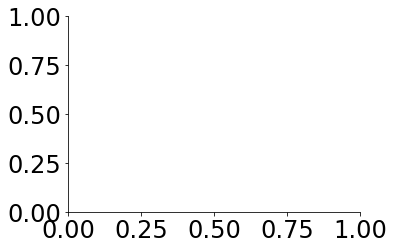

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-iSPN-to-ChIN-synapses-2D-dist.pdf


In [18]:
  from snudda.analyse_striatum import SnuddaAnalyseStriatum
  nas = SnuddaAnalyseStriatum("networks/tinySim",volumeType="cube")
    
  plotHenrike = True
  plotChIN = True
  plotLTS = True

  dist3D = False
  #dist3D = True


  if(plotHenrike):

    yMaxH = None #0.5

    nas.plotConnectionProbability("dSPN","iSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[3/47.0,3/66.0],
                                  expDataDetailed=[(3,47),(3,66)],
                                  yMax=yMaxH)
    nas.plotConnectionProbability("dSPN","dSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[5/19.0,3/43.0],
                                  expDataDetailed=[(5,19),(3,43)],
                                  yMax=yMaxH)    
    nas.plotConnectionProbability("iSPN","dSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[13/47.0,10/80.0],
                                  expDataDetailed=[(13,47),(10,80)],
                                  yMax=yMaxH)
    nas.plotConnectionProbability("iSPN","iSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[14/39.0,7/31.0],
                                  expDataDetailed=[(14,39),(7,31)],
                                  yMax=yMaxH)


  if(True):

    nas.plotConnectionProbability("FSN","iSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[100e-6, 150e-6, 250e-6],
                                  expData=[6/9.0, 21/54.0, 27/77.0],
                                  expDataDetailed=[(6,9),(21,54),(27,77)],
                                  yMax=None)

    nas.plotConnectionProbability("FSN","dSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[100e-6, 150e-6, 250e-6],
                                  expData=[8/9.0, 29/48.0, 48/90.0],
                                  expDataDetailed=[(8,9),(29,48),(48,90)],
                                  yMax=None)

    
    #  Gittis,...,Kreitzer 2010 (p2228) -- 7/12 (and 3/4 reciprocal) -- distance?
    # FS->FS synapses weaker, 1.1 +/- 1.5nS  
    nas.plotConnectionProbability("FSN","FSN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[250e-6],\
                                  expData=[7/12.0],
                                  expDataDetailed=[(7,12)] )
    
    # Koos & Tepper 1999, 2/6
    nas.plotConnectionProbability("FSN","FSN", \
                                  dist3D=dist3D ,
                                  connectionType="gapjunctions",
                                  expMaxDist=[250e-6,250e-6],
                                  expData=[2/6.0,3/7.0],
                                  expDataDetailed=[(2,6),(3,7)],)



  if(plotLTS):

    # 3/21 LTS->MS, Basal Ganglia book --- distance??
    # Ibanez-Sandoval, ..., Tepper  2011 3/21 -- if patching around visual axon
    # but 2/60 when patching blind
    nas.plotConnectionProbability("LTS","dSPN", \
                                  dist3D=dist3D,
                                  expMaxDist=[250e-6],
                                  expData=[2/60.0],
                                  expDataDetailed=[(2,60)],
                                  xMax=500)

    nas.plotConnectionProbability("LTS","iSPN", \
                                  dist3D=dist3D,
                                  expMaxDist=[250e-6],
                                  expData=[2/60.0],
                                  expDataDetailed=[(2,60)],
                                  xMax=500)

  
    # Silberberg et al 2013, 2/12 FS-> LTS connected --- distance??
    nas.plotConnectionProbability("FSN","LTS", \
                                  dist3D=dist3D,
                                  expMaxDist=[250e-6],
                                  expData=[2.0/12],
                                  expDataDetailed=[(2,12)])

  nas.plotConnectionProbability("ChIN","LTS", \
                                dist3D=dist3D)
  
  # Janicova 2015?? --- distance??!
  nas.plotConnectionProbability("ChIN","iSPN", \
                                dist3D=dist3D,
                                expMaxDist=[250e-6],
                                expData=[0.05])
    
  nas.plotConnectionProbability("ChIN","dSPN", \
                                dist3D=dist3D,
                                expMaxDist=[250e-6],
                                expData=[0.05])
  
  if(True):
    nas.plotConnectionProbability("LTS","ChIN", \
                                  dist3D=dist3D )

  if(plotChIN):    
    nas.plotConnectionProbability("ChIN","FSN", \
                                  dist3D=dist3D,
                                  yMax=None)

    nas.plotConnectionProbability("dSPN","ChIN", \
                                  dist3D=dist3D)
    nas.plotConnectionProbability("iSPN","ChIN", \
                                  dist3D=dist3D)

